In [71]:
import matplotlib.pyplot as plt
from subprocess import check_output

input_folder = "../dataset"

###run once
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import os
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
import graphviz
import pydotplus 
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.linear_model import BayesianRidge as br
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#print(os.environ["PATH"])

In [55]:
movie_file = pd.read_csv(input_folder+"/movie_metadata_cleaned_filled_values.csv")
movie_data= DataFrame(movie_file)
movie_data.fillna(movie_data.mean())
movie_data = movie_data.dropna()

#movie_data.head(10)
#len(movie_data)

,color,movie_title,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,release_date,blockbuster_month,dump_month,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,Avatar,James Cameron,721,178,7000,862,Joel David Moore,1000,760505847.0,...,18-Dec-2009,1,0,PG-13,237000000.0,2009.0,942.0,7.8,1.78,34000
1,Color,Titanic,James Cameron,316,194,7000,787,Kate Winslet,29000,658672302.0,...,19-Dec-1997,1,0,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,27000
2,Color,Jurassic World,Colin Trevorrow,654,124,367,878,Bryce Dallas Howard,3000,652177271.0,...,12-Jun-2015,1,0,PG-13,150000000.0,2015.0,3000.0,7.0,2.00,151000
3,Color,Furious 7,James Wan,432,140,0,14000,Paul Walker,26000,350034110.0,...,03-Apr-2015,0,0,PG-13,190000000.0,2015.0,23000.0,7.2,2.35,95000
4,Color,Avengers: Age of Ultron,Joss Whedon,650,141,0,19000,Robert Downey Jr.,26000,458991599.0,...,01-May-2015,0,0,PG-13,250000000.0,2015.0,21000.0,7.4,2.35,119000
6,Color,Frozen,Chris Buck,420,102,69,490,Maurice LaMarche,1000,400736600.0,...,22-Nov-2013,0,0,PG,150000000.0,2013.0,525.0,7.5,2.35,58000
7,Color,Iron Man 3,Shane Black,611,195,0,1000,Don Cheadle,21000,408992272.0,...,03-May-2013,0,0,PG-13,200000000.0,2013.0,3000.0,7.2,2.35,95000
8,Color,Minions,Kyle Balda,319,91,22,1000,Jon Hamm,7000,336029560.0,...,10-Jul-2015,1,0,PG,74000000.0,2015.0,4000.0,6.4,1.85,71000
9,Color,Captain America: Civil War,Anthony Russo,579,147,96,11000,Scarlett Johansson,21000,408080554.0,...,06-May-2016,0,0,PG-13,250000000.0,2016.0,19000.0,7.9,2.35,80000
10,Color,The Lord of the Rings: The Return of the King,Peter Jackson,326,192,8000,427,Billy Boyd,5000,377019252.0,...,17-Dec-2003,1,0,PG-13,94000000.0,2003.0,867.0,8.9,2.35,16000


In [68]:
drop_predictors = ['gross', 'worldwide_gross','color', 'movie_title', 'director_name',
       'actor_1_name', 'actor_2_name','actor_3_name', 
       'content_rating', 'genres', 'plot_keywords', 'movie_imdb_link', 'country', 'language', 'release_date','title_year','aspect_ratio']

#define predictors and predicted values
X = movie_data.drop(drop_predictors, axis=1)
y = movie_data.worldwide_gross

from sklearn import preprocessing

####standardize data to address different scales.
standardized_X = preprocessing.scale(X)
standardized_y = preprocessing.scale(y)
#print(standardized_y)

#### split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(standardized_X, standardized_y, train_size=0.7, random_state=0)

###cannot prune tree; using 'max_depth' instead, that is if we want to indicate how far tree should go
reg_model = DecisionTreeRegressor()

##Train the model using the training sets 
reg_model.fit(X_train, y_train)

[ 14.98577062  11.75611368   8.75245991 ...,  -0.61556821  -0.61556821
  -0.61556821]


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.169675 to fit



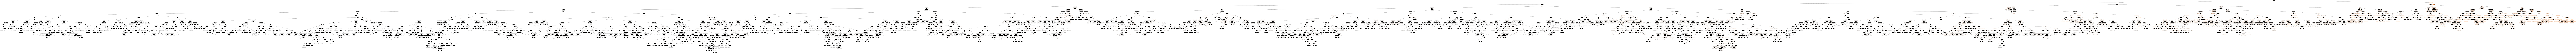

In [69]:
####visualize tree
#tree.export_graphviz(reg_model, out_file='tree.png') 
from IPython.display import Image  
dot_data = tree.export_graphviz(reg_model, out_file=None, 
                                feature_names = X.columns, filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
#graph.write_pdf("imdb_tree.pdf") 
Image(graph.create_png())  

###Resultant tree graph scaled by by 0.155426 to fit

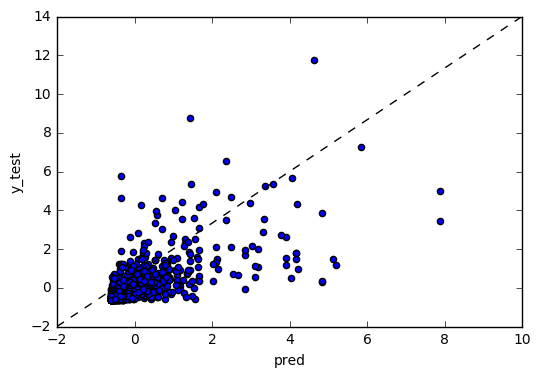

0.40635013595853053

In [73]:
pred = reg_model.predict(X_test)
plt.scatter(pred, y_test, label='worldwide_gross')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
plt.show()
#mean_squared_error(y_test, pred)
#?? 138869881.061???
r2_score(y_test, pred, multioutput='variance_weighted')  